In [1]:
# txt to csv
import pandas as pd

df = pd.read_csv('/kaggle/input/linkdata/link.txt', delimiter='\t')

df.to_csv('link.csv', index=False)

In [2]:
#txt to csv
import pandas as pd

df = pd.read_csv('/kaggle/input/diseasegene/info.txt', delimiter='\t')

df.to_csv('info.csv', index=False)

In [3]:
# Merge columns
import pandas as pd

first_df = pd.read_csv('/kaggle/input/string-protein-csv/link.csv')

second_df = pd.read_csv('/kaggle/input/string-protein-csv/info.csv')

merged_df_p1 = pd.merge(first_df, second_df, how='left', left_on='protein1', right_on='#string_protein_id')
first_df['protein1']=merged_df_p1['preferred_name']

merged_df_p2 = pd.merge(first_df, second_df, how='left', left_on='protein2', right_on='#string_protein_id')
first_df['protein2']=merged_df_p2['preferred_name']

first_df.to_csv('merged1.csv', index=False)

In [4]:
# normalisation
import pandas as pd
df_input=pd.read_csv('/kaggle/working/merged1.csv')
scale_factor=0.001
df_input['combined_score'] = df_input['combined_score'] * scale_factor
df_input.to_csv('merged.csv', index=False)

In [5]:
import pandas as pd

# Read the output CSV file
df_output = pd.read_csv('/kaggle/input/database2/merged.csv')
# PARP1 is a protein related to Parkinson's disease.
row_parp1 = df_output[df_output['protein1'] == 'PARP1']
print(row_parp1)

        protein1 protein2  combined_score
7215856    PARP1    EEF2K           0.188
7215857    PARP1      PML           0.210
7215858    PARP1     HEY1           0.188
7215859    PARP1      EPO           0.238
7215860    PARP1    RABIF           0.154
...          ...      ...             ...
7218746    PARP1    MAP1B           0.378
7218747    PARP1     RPL6           0.168
7218748    PARP1  TMEM198           0.228
7218749    PARP1     CYCS           0.892
7218750    PARP1     MT1E           0.206

[2895 rows x 3 columns]


In [6]:
import pandas as pd

# Read the output CSV file
df_output = pd.read_csv('/kaggle/input/database3/disgenet.csv')
# CYCS is associated to PARP1 with a score of 0.892
# Check if 'CYCS' is present in the 'geneSymbol' column
if 'CYCS' in df_output['geneSymbol'].values:
    # Print the row corresponding to 'CYCS'
    row_cycs = df_output[df_output['geneSymbol'] == 'CYCS']
    print(row_cycs)
else:
    print("CYCS is not present in the Disgenet.")
    #hgkjsc

CYCS is not present in the Disgenet.


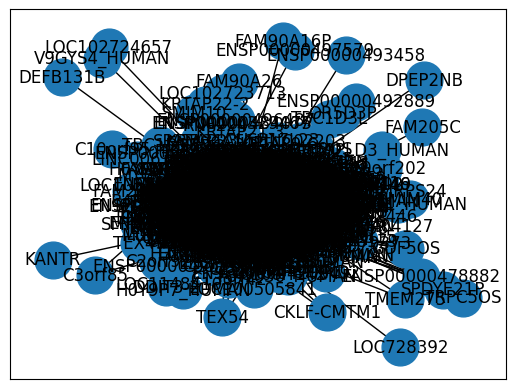

In [7]:
# convert to graph
import csv
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

with open('/kaggle/input/database2/merged.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        node1, node2, weight = row[0], row[1], float(row[2])
        G.add_edge(node1, node2, weight=weight)

pos = nx.spring_layout(G)

nx.draw_networkx(G, pos, with_labels=True, node_size=700)

plt.show()

In [8]:
# from node2vec import Node2Vec
# node2vec = Node2Vec(G, dimensions=128, walk_length=30, num_walks=200, workers=4)

# model = node2vec.fit(window=10, min_count=1, batch_words=4)

# embeddings = {node: model.wv[node] for node in G.nodes()}

In [9]:
# mapping between disgenet and node embeddings(string)
import pandas as pd

# Read the two CSV files
df1 = pd.read_csv('/kaggle/input/database2/merged.csv')
df2 = pd.read_csv('/kaggle/input/database3/disgenet.csv')

# Extract genes related to Parkinson's disease from the second CSV file
parkinson_genes = df2['geneSymbol'].tolist()
# Find genes connected to the given gene in the first CSV file
connected_genes = set()

for gene in parkinson_genes:
    # Filter rows where the gene is either in 'protein1' or 'protein2' columns
    connected_rows = df1[(df1['protein1'] == gene) | (df1['protein2'] == gene)]
    # Add connected genes to the set
    connected_genes.update(set(connected_rows['protein1']).union(connected_rows['protein2']))
    print(gene,end=' ')
connected_genes = list(connected_genes)  # Convert set back to list if needed

A2M NAT2 SERPINA3 ABCA1 ABL1 AOC1 ACACA ASIC2 ACHE ACO1 ACO2 ACP3 ACTB ACTG1 ACTG2 ADA ADAM10 ADARB2 ADCY5 ADCYAP1 ADCYAP1R1 ADH1B ADH1C ADH4 ADH7 ADORA1 ADORA2A PARP1 ADRB2 GRK2 GRK3 TLE5 AGER AGT AGTR1 APLNR AHR AIF1 AKT1 ALAD ALB ALDH1A1 ALDH2 AKR1B1 ALOX5 AMFR BIN1 ANG ANGPT1 ANGPT2 ANK1 ANK2 ANXA5 APAF1 APBB1 APC APEX1 XIAP APOA1 APOB APOC3 APOD APOE APP APRT KLK3 FAS FASLG AQP1 AQP4 AQP9 AR ARF3 ARG1 ARNTL ARR3 ARRB1 ARSA ASAH1 ASCL1 ASIP GET3 ATF4 ATM ATOX1 ATP1A3 ATP5F1B ATP7A ATR AVP BAG1 ADGRB1 BAX BCHE BCL2 BCL2L1 HCN2 BCR BDNF CFB BGLAP BMI1 BMP2 BMX BNIP3L DST BRAF BST1 KLF9 TSPO C1R C4A C4B CA2 CA8 CA12 CACNA1A CALB1 CALB2 CALCA CALCR CALD1 CALR CAPN1 CAST CASP1 CASP3 CASP6 CASP7 CASP8 CASP9 CASR CAT CAV1 CAV2 RUNX1 CBS CCK CCKAR CCKBR CCND3 CD14 CD19 CD28 CD34 CD36 SCARB2 CD38 CD44 CD47 CD59 CD69 CDA CDK1 CDC42 CDH8 CDK5 CDK6 CDKN1A CDKN1B CDKN2A CDKN2D CEBPB CEL CTSC CHAT CHI3L1 CHIT1 CHM CHRM3 CHRNA4 CHRNA5 CHRNB3 CHRNB4 CLU CLK1 CLN3 CMA1 CCR3 CCR5 CCR7 ABCC2 CNGA1 CN

In [10]:
# Assign a value of 1 to all indirectly associated genes in the mapping column
df_output = pd.read_csv('/kaggle/input/database3/embedding_output.csv', header=None)
df_output['mapping'] = df_output[0].isin(connected_genes).astype(int)

# Save the output to a CSV file
df_output.to_csv('output.csv', index=False)

In [11]:
import pandas as pd

# Read the output CSV file without specifying column names
df_output = pd.read_csv('/kaggle/input/mapping/output.csv', header=None)

# Find the index of the row corresponding to 'CYCS'
index_cycs= df_output[df_output[0] == 'CYCS'].index[0]
# Print the row corresponding to 'CYCS'
print(df_output.iloc[index_cycs])

0          CYCS
1     -0.721581
2      0.381609
3      0.102114
4     -0.080904
         ...   
125   -0.006669
126    0.166178
127    0.018043
128   -0.215214
129           1
Name: 5549, Length: 130, dtype: object


/tmp/ipykernel_18/2720322309.py:4: DtypeWarning: Columns (129) have mixed types. Specify dtype option on import or set low_memory=False.
  df_output = pd.read_csv('/kaggle/input/mapping/output.csv', header=None)


Accuracy: 0.961510060919328
Recall: 0.952195664257921
Precision: 0.9699886749716874
F1 Score: 0.9610098176718092
Confusion Matrix:
 [[5278  159]
 [ 258 5139]]


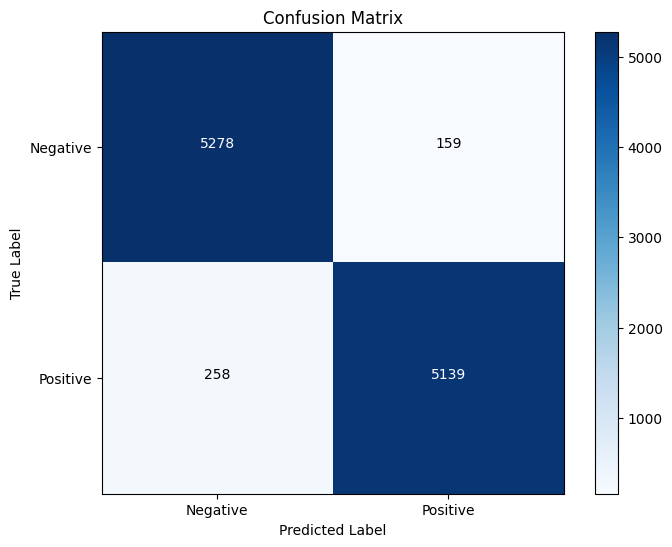

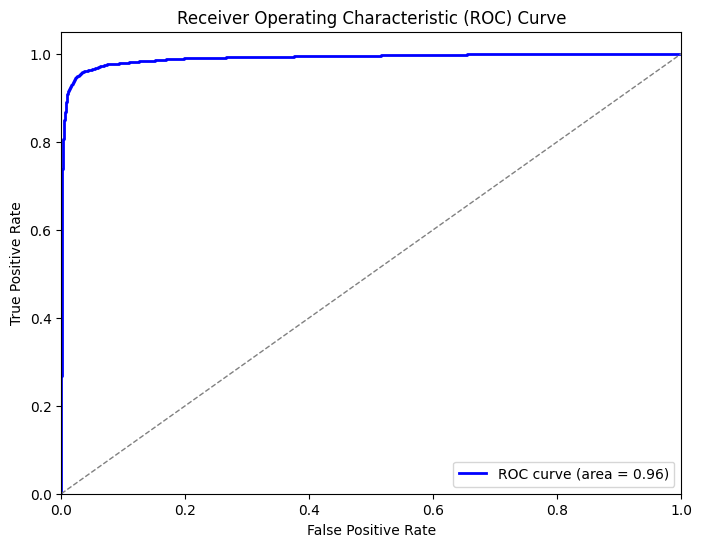

In [12]:
#confusion matrix after pca
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix

data = pd.read_csv('/kaggle/input/mapping/output.csv')

X = data.drop(['mapping'], axis=1)
y = data['mapping']

column_transformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X_encoded = column_transformer.fit_transform(X)

if isinstance(X_encoded, csr_matrix):
    X_encoded = X_encoded.toarray()

# smote
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# pca
pca = PCA(n_components=100)  
X_pca = pca.fit_transform(X_resampled)

# train and test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.3, random_state=42)

# ensemble
ada = AdaBoostClassifier()
xgb_model = xgb.XGBClassifier()
rf = RandomForestClassifier()

ensemble = VotingClassifier(estimators=[('ada', ada), ('xgb', xgb_model), ('rf', rf)], voting='soft')

ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(2), ['Negative', 'Positive'])
plt.yticks(np.arange(2), ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# roc curve
fpr, tpr, thresholds = roc_curve(y_test, ensemble.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % accuracy)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.9434188665312904
Recall: 0.9455252918287937
Precision: 0.9411656215418664
F1 Score: 0.9433404196321287


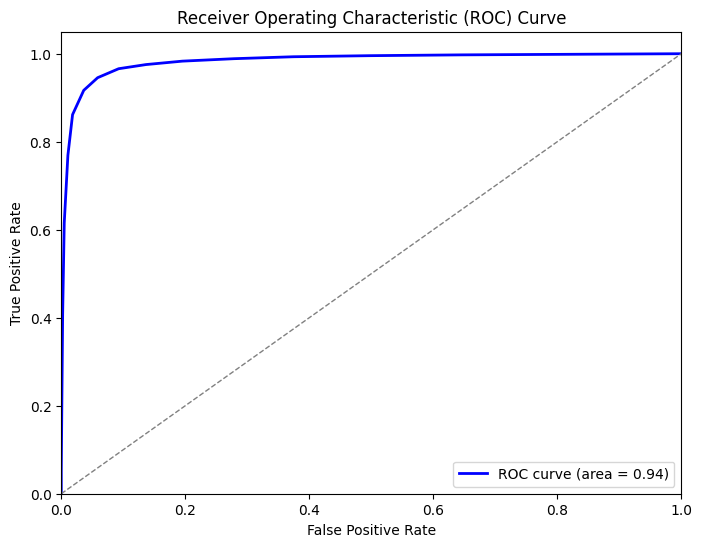

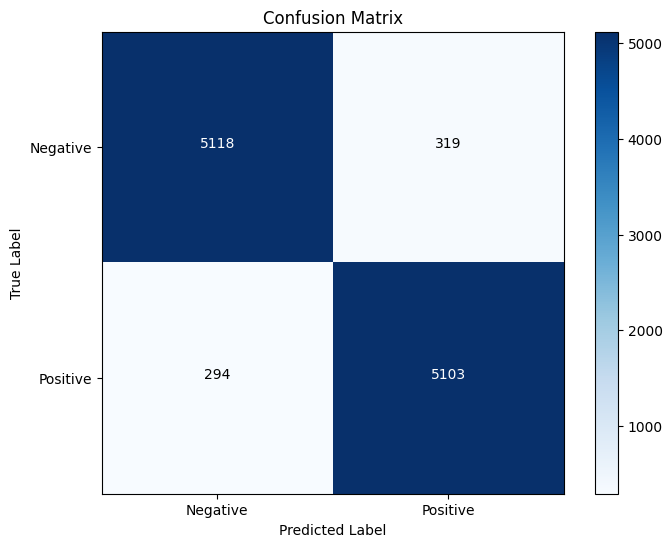

In [13]:
### random forest without drop with smote
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
data = pd.read_csv('/kaggle/input/mapping/output.csv')

X = data.drop(['mapping'], axis=1) 
y = data['mapping']

column_transformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X_encoded = column_transformer.fit_transform(X)

if isinstance(X_encoded, csr_matrix):
    X_encoded = X_encoded.toarray()

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

pca = PCA(n_components=100)  
X_pca = pca.fit_transform(X_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=15)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % accuracy)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(2), ['Negative', 'Positive'])
plt.yticks(np.arange(2), ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy: 0.9501569134207126
Recall: 0.9384843431536039
Precision: 0.9605537644604589
F1 Score: 0.9493908153701968


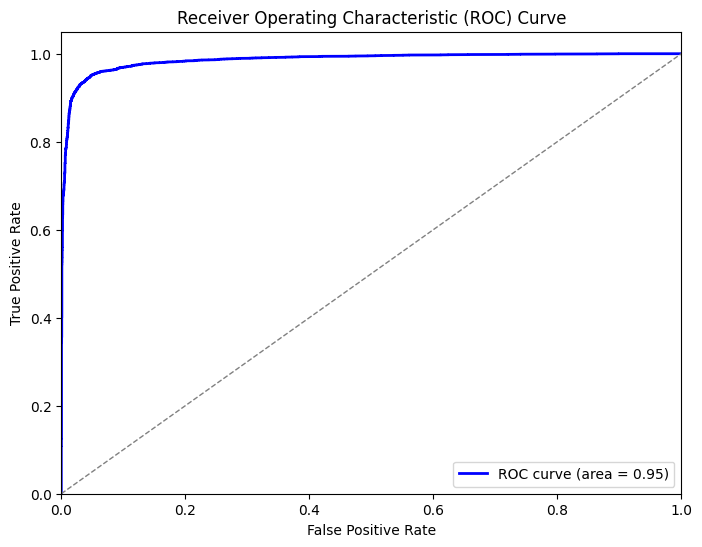

In [14]:
# xgboost drop with smote
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix

data = pd.read_csv('/kaggle/input/mapping/output.csv')

X = data.drop(['mapping'], axis=1)
y = data['mapping']

column_transformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X_encoded = column_transformer.fit_transform(X)

if isinstance(X_encoded, csr_matrix):
    X_encoded = X_encoded.toarray()

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

pca = PCA(n_components=100)  
X_pca = pca.fit_transform(X_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.3, random_state=42)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % accuracy)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.7968432711833118
Recall: 0.7959977765425236
Precision: 0.7961452928094885
F1 Score: 0.7960715278421199


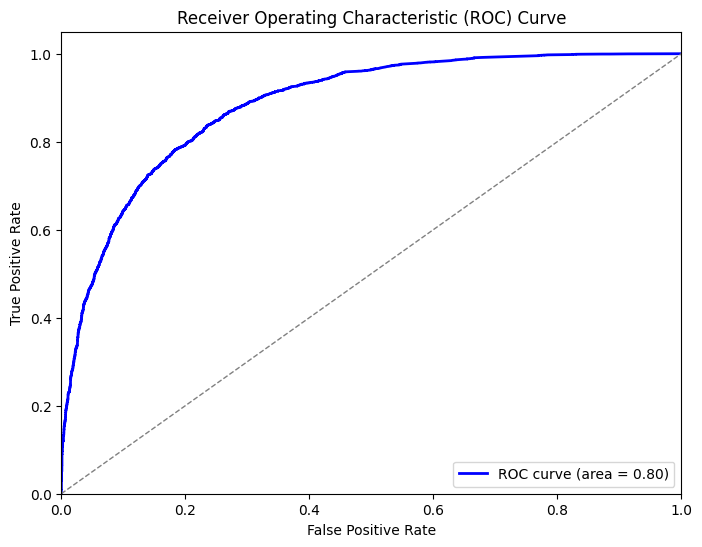

In [15]:
# adaboost drop with smote
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix

data = pd.read_csv('/kaggle/input/mapping/output.csv')

X = data.drop(['mapping'], axis=1) 
y = data['mapping']

column_transformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X_encoded = column_transformer.fit_transform(X)

if isinstance(X_encoded, csr_matrix):
    X_encoded = X_encoded.toarray()

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

pca = PCA(n_components=100)  
X_pca = pca.fit_transform(X_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.3, random_state=42)

model = AdaBoostClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % accuracy)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()